In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
titanic = pd.read_csv('C:\\Users\\user\\Downloads\\titanic.csv')


In [4]:
titanic.shape

(891, 12)

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
titanic = titanic.assign(RelSp=np.logical_or(titanic["SibSp"],titanic["Parch"]))

In [9]:
titanic.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,RelSp
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,False
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,False
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,True
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,True
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,True


In [51]:
titanic.query('Sex == "male" and Survived == 1').shape[0]/titanic.query('Sex == "male"').shape[0] 

0.18890814558058924

In [52]:
titanic.query('Sex == "female" and Survived == 1').shape[0]/titanic.query('Sex == "female"').shape[0] 

0.7420382165605095

In [54]:
titanic.query('Age >  60 and Survived == 1').shape[0]/titanic.query('Age > 60').shape[0] 

0.22727272727272727

In [39]:
table = pd.pivot_table(titanic[['Sex','Survived']], columns=['Sex'], index=['Survived'], aggfunc=len)
table = table.set_axis(['not survived', 'survived'], axis='index')
table = table.set_axis(['female', 'male'], axis='columns')
table

,female,male
not survived,81,468
survived,233,109


array([<AxesSubplot: ylabel='female'>, <AxesSubplot: ylabel='male'>],
      dtype=object)

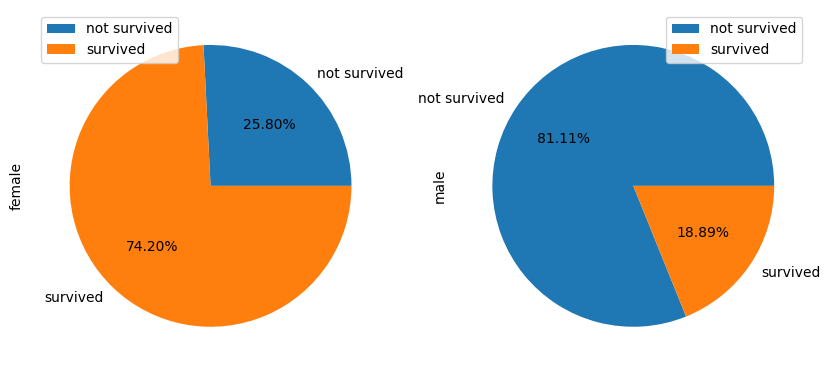

In [52]:
table.plot(kind = 'pie', subplots=True,figsize=(10, 10), autopct=lambda x: '{:.2f}%'.format(x))

<AxesSubplot: >

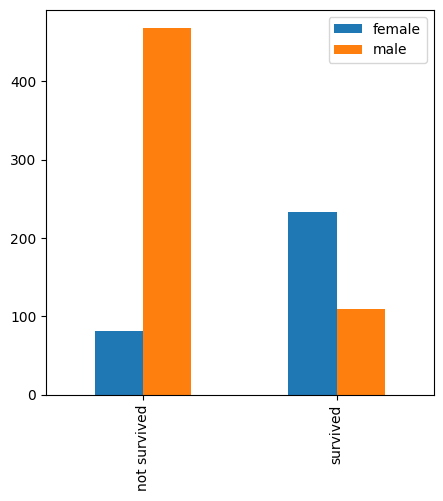

In [56]:
table.plot(kind = 'bar', subplots=False,figsize=(5, 5))

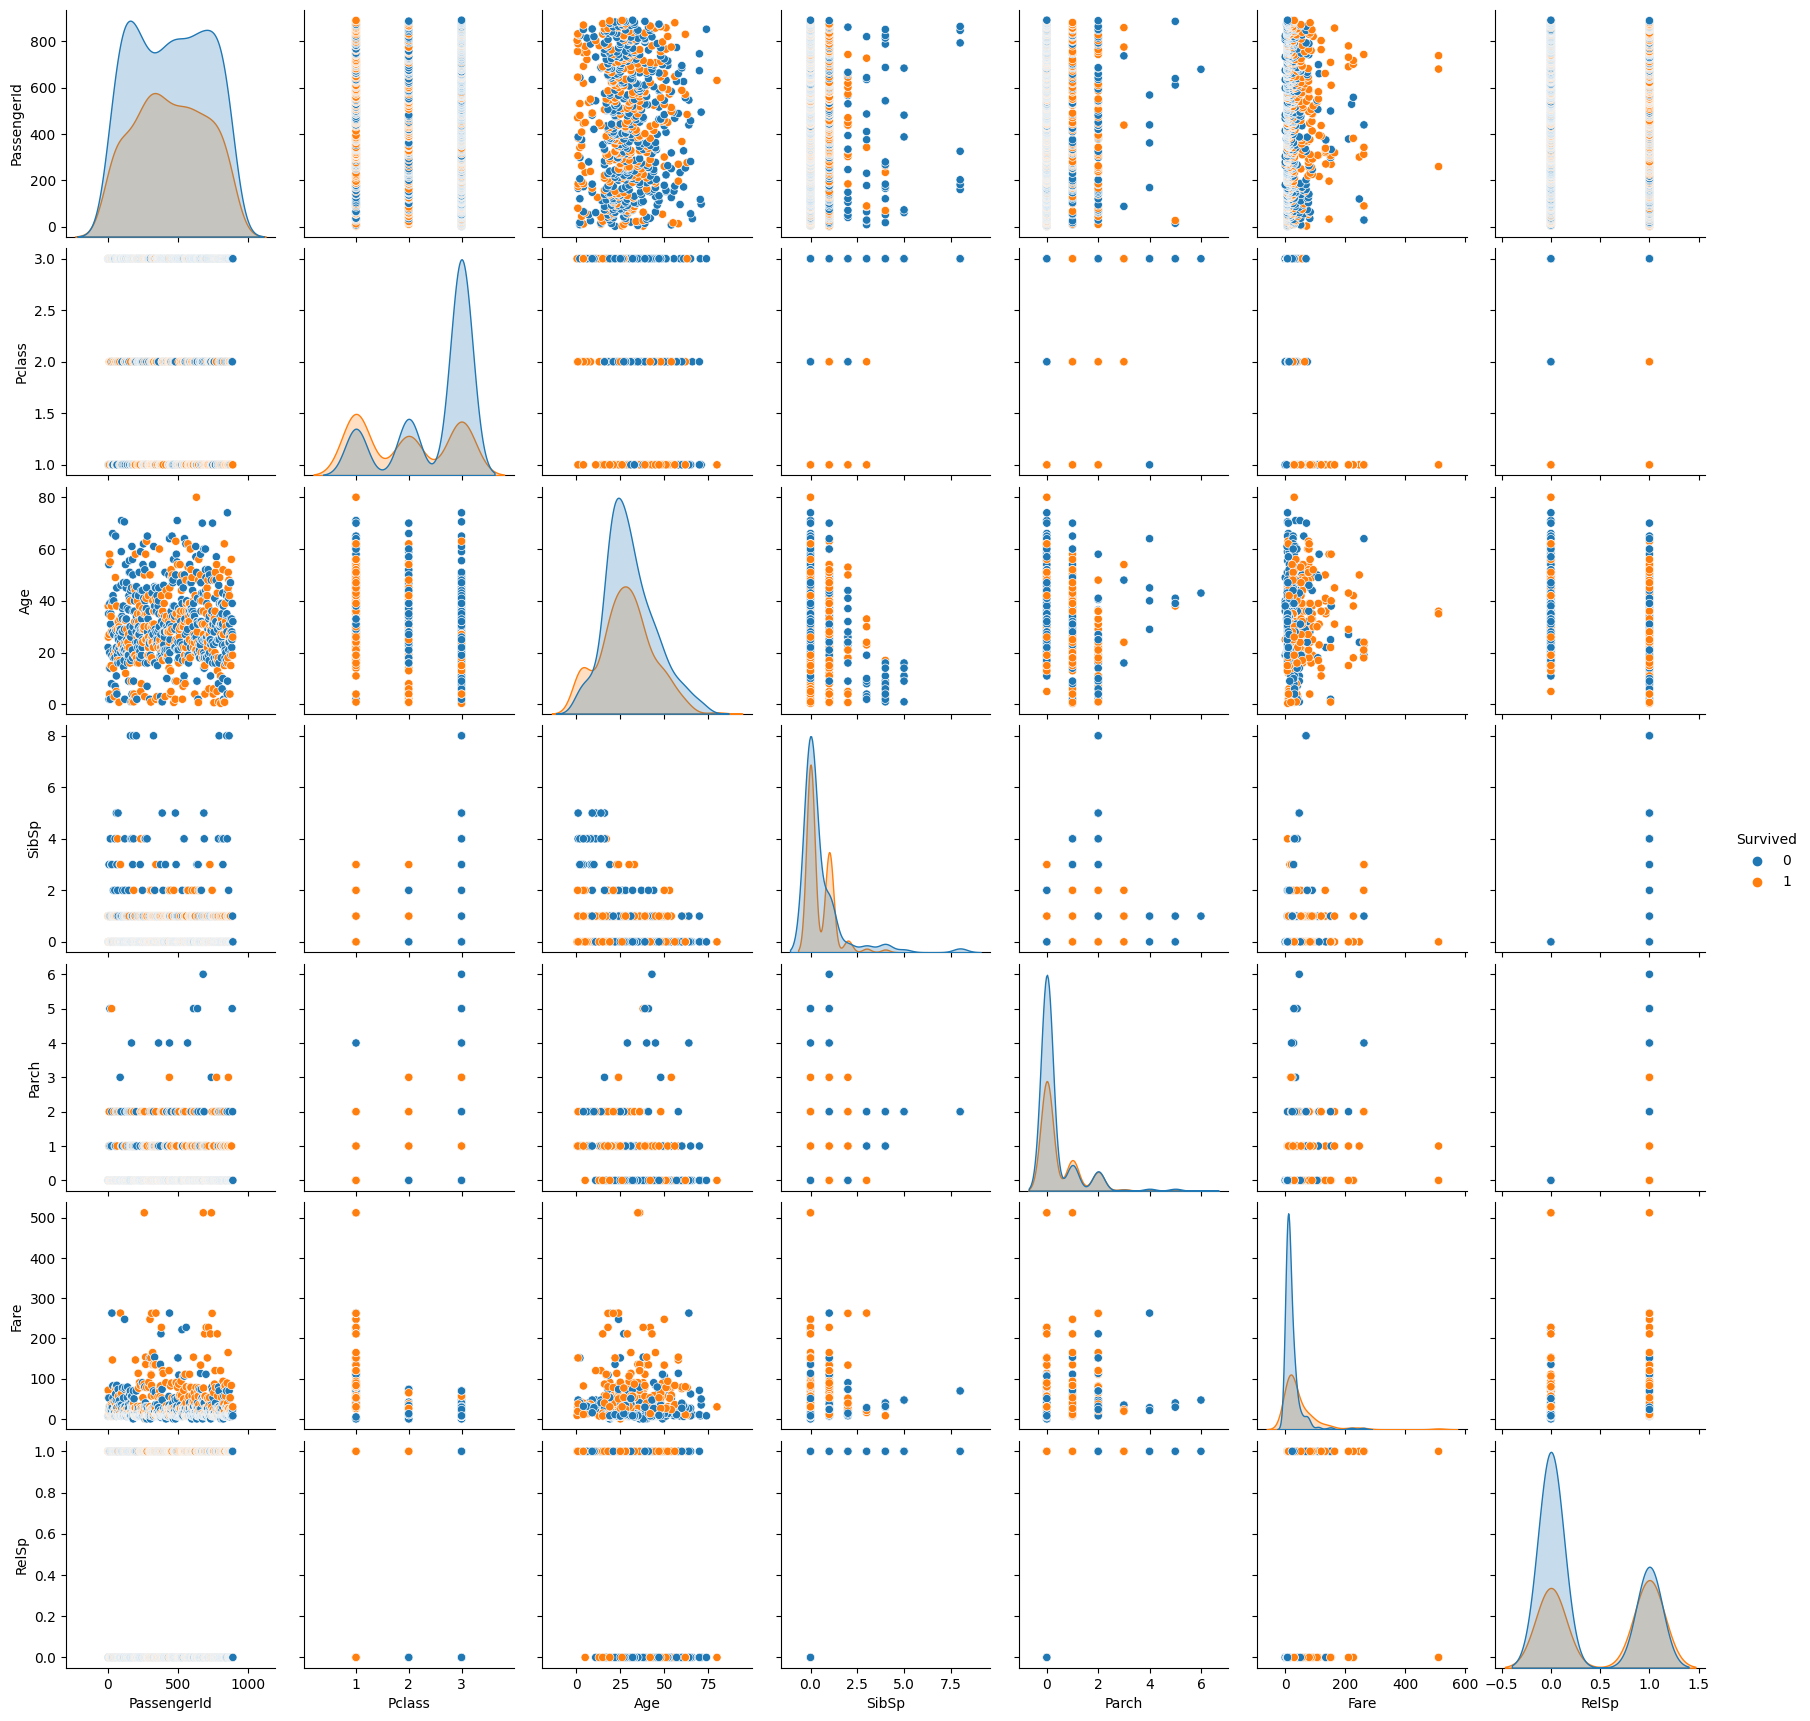

In [63]:
sns.pairplot(titanic, hue="Survived")

<AxesSubplot: xlabel='Survived', ylabel='Age'>

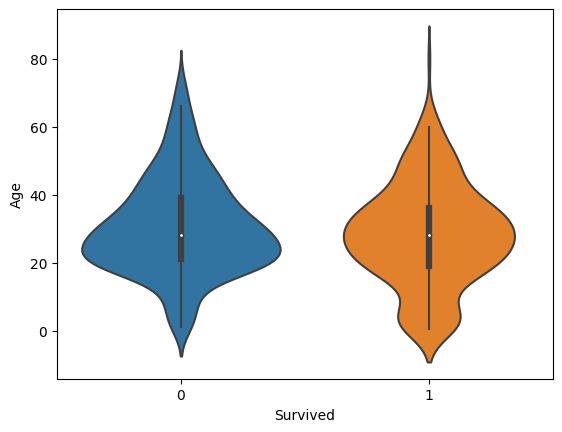

In [10]:
sns.violinplot(data=titanic, x="Survived", y="Age",orient="v")

In [102]:
titanic['Pclass'] = titanic['Pclass'].replace({1:'First', 2:'Second', 3: 'Economy'})

In [103]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,RelSp
0,1,0,Economy,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True
1,2,1,First,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,1,Economy,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,First,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
4,5,0,Economy,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,Second,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,False
887,888,1,First,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,False
888,889,0,Economy,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,True
889,890,1,First,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,False
